In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample Dataset
X = np.array([[1,2],[2,3],[3,1],[4,2],[2,4],[3,3]])
y = np.array([0,0,0,1,1,1])

In [3]:
# Perceptron Learning Law
class Perceptron:
    def __init__(self, lr=0.1, epochs=100):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        # Initialize Weights and Bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            for xi, yi in zip(X, y):
                # Calculate Prediction
                prediction = self.predict(xi)

                # Update Weights and Bias
                delta = self.lr * (yi - prediction)
                self.weights += delta * xi
                self.bias += delta

    def predict(self, X):
        # Calculate Activation
        activation = np.dot(X, self.weights) + self.bias

        # Apply Step Function
        return np.where(activation >= 0, 1, 0)

In [4]:
# Train Perceptron
perceptron = Perceptron(lr=0.1, epochs=100)
perceptron.fit(X,y)

In [5]:
perceptron.weights

array([0.6, 0.3])

In [6]:
perceptron.bias

-2.3000000000000007

In [7]:
perceptron.epochs

100

In [8]:
# Decision Regions
x_min, x_max = X[:,0].min() -1, X[:,0].max() +1
y_min, y_max = X[:,1].min() -1, X[:,0].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

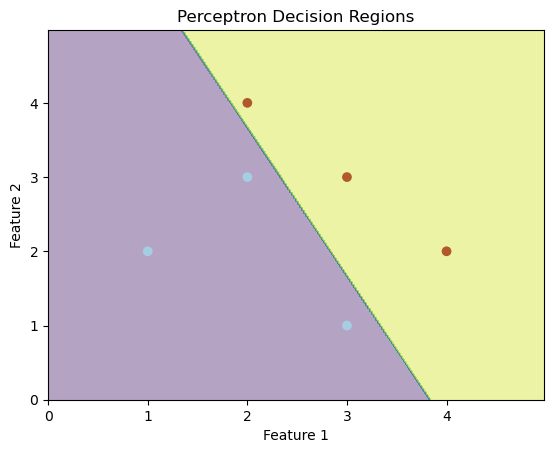

In [9]:
# Plot Results
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Regions')
plt.show()